# Confusion Matrix

This is just prettying up the default confusion matrix plot for my slides

In [13]:
import pandas as pd
import numpy as np
import pickle

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [15]:
with open('cmdf.pkl', 'rb') as fp:
    cmdf = pickle.load(fp)

In [16]:
cmdf

,0,1,2,3,4,5,6,7,8,9
0,875889,10,228,9299,7,297,1272,1,500,1
1,1,83840,982,289,607,20,40,55,347,11
2,6,3,8446,911,5344,818,146,770,950,416
3,24,8,64,7943,655,187,35,355,413,14
4,0,1,1026,187,4207,88,57,528,411,36
5,0,1,42,155,734,4330,3,99,201,29
6,10,0,15,0,596,2,218,213,16,0
7,0,0,36,19,529,15,17,265,45,5
8,0,0,0,26,0,50,0,0,528,0
9,0,0,3,4,0,0,0,0,5,57


In [17]:
names = ['Normal', 'Generic', 'Exploit', 'Fuzzer',
        'Deny Serv', 'Reconn', 'Analysis', 'Backdoor',
        'Shellcode', 'Worm']
cmdf.index = names
cmdf.columns = names
cmdf

,Normal,Generic,Exploit,Fuzzer,Deny Serv,Reconn,Analysis,Backdoor,Shellcode,Worm
Normal,875889,10,228,9299,7,297,1272,1,500,1
Generic,1,83840,982,289,607,20,40,55,347,11
Exploit,6,3,8446,911,5344,818,146,770,950,416
Fuzzer,24,8,64,7943,655,187,35,355,413,14
Deny Serv,0,1,1026,187,4207,88,57,528,411,36
Reconn,0,1,42,155,734,4330,3,99,201,29
Analysis,10,0,15,0,596,2,218,213,16,0
Backdoor,0,0,36,19,529,15,17,265,45,5
Shellcode,0,0,0,26,0,50,0,0,528,0
Worm,0,0,3,4,0,0,0,0,5,57


In [18]:
percents = cmdf.copy()
sums = cmdf.sum(axis=1)

In [19]:
for row in percents.index:
    for col in percents.index:
        percents.loc[row,col] /= sums[row]
percents *= 100
raw_percents = percents
percents = percents.round(decimals=0).astype(int)
percents

,Normal,Generic,Exploit,Fuzzer,Deny Serv,Reconn,Analysis,Backdoor,Shellcode,Worm
Normal,99,0,0,1,0,0,0,0,0,0
Generic,0,97,1,0,1,0,0,0,0,0
Exploit,0,0,47,5,30,5,1,4,5,2
Fuzzer,0,0,1,82,7,2,0,4,4,0
Deny Serv,0,0,16,3,64,1,1,8,6,1
Reconn,0,0,1,3,13,77,0,2,4,1
Analysis,1,0,1,0,56,0,20,20,1,0
Backdoor,0,0,4,2,57,2,2,28,5,1
Shellcode,0,0,0,4,0,8,0,0,87,0
Worm,0,0,4,6,0,0,0,0,7,83


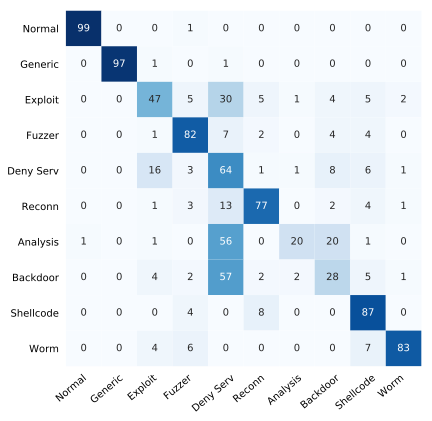

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(percents, square=True, annot=True, fmt='',
           ax=ax, cmap='Blues', cbar=False)

plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=False, right=False)

locs,labels = plt.xticks()
locs = [ l - .35 for l in locs ]
plt.xticks(locs, rotation=40)

plt.tight_layout()
plt.savefig('multiclass.svg')
plt.show()